In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time


In [3]:
data=pd.read_excel("C:\\Users\\Shree\\Desktop\\assigmee forecastingnt\\Airlines+Data.xlsx",sheet_name='Sheet1')

In [4]:
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [19]:
data.tail(30)

,Month,Passengers
66,2000-07-01,302
67,2000-08-01,293
68,2000-09-01,259
69,2000-10-01,229
70,2000-11-01,203
71,2000-12-01,229
72,2001-01-01,242
73,2001-02-01,233
74,2001-03-01,267
75,2001-04-01,269


In [5]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [8]:
data.shape

(96, 2)

C:\Users\Shree\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Passengers'>

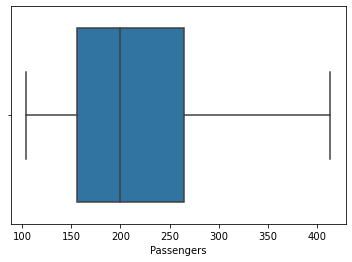

In [9]:
sns.boxplot('Passengers',data=data)

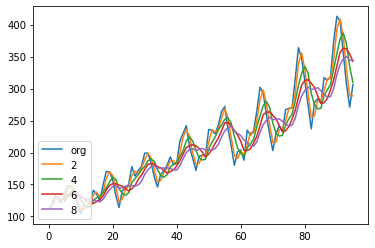

In [13]:
data.Passengers.plot(label='org') #moving average to understand time series
for i in range (2,10,2):
    data['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

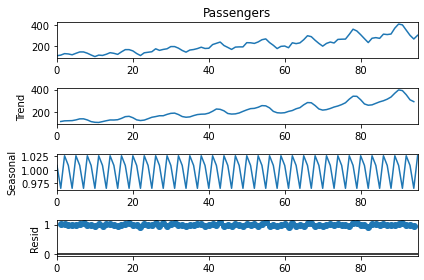

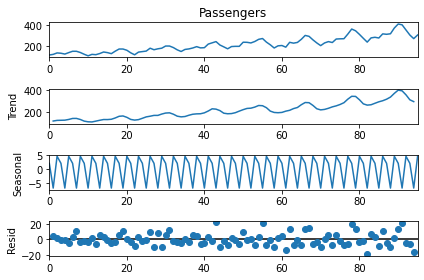

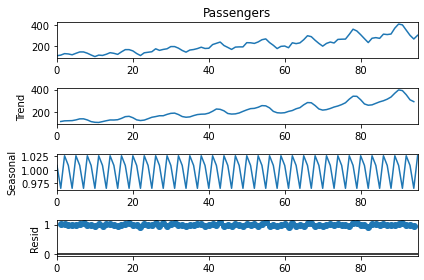

In [15]:
decompose_ts_add=seasonal_decompose(data.Passengers,model="additive",period=3) # time series decompose plot
decompose_ts_add.plot()
decompose_ts_mul=seasonal_decompose(data.Passengers,model='multiplicative',period=3)
decompose_ts_mul.plot()

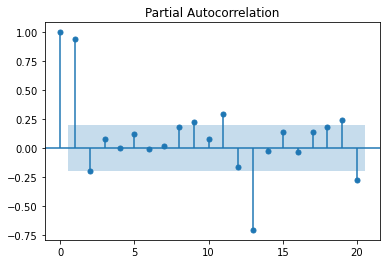

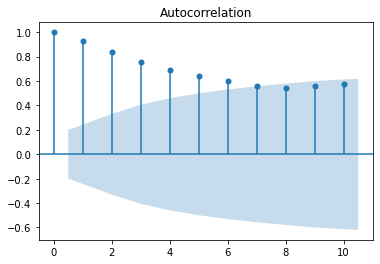

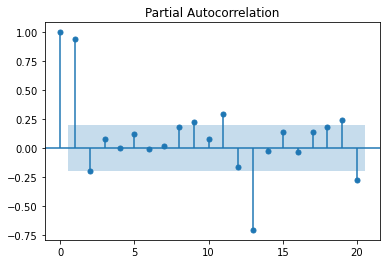

In [16]:
tsa_plots.plot_acf(data.Passengers,lags=10) # acf and pacf plot
tsa_plots.plot_pacf(data.Passengers)

In [26]:
# we will forecast for last two years
train=data.head(71)
test=data.tail(23)

In [27]:
# calculate the MAPE value for test data 

In [28]:
def MAPE (pred,org):
    Passenger=np.abs((pred-org))*100/org
    return np.mean(Passenger)

In [29]:
ses_model=SimpleExpSmoothing(train['Passengers']).fit()                         # simple exponential method
pred_ses=ses_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_ses,test.Passengers)

32.77539155237593

In [30]:
hw_model=Holt(train['Passengers']).fit()                                      # Holt method
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hw,test.Passengers)

26.928199281829368

In [32]:
hwe_model_add_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=4,damped=True).fit() 
pred_hwe_add_add=hwe_model_add_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_add_add,test.Passengers)
# holt winter exponential smoothing with additive seasonability and additive trend

C:\Users\Shree\AppData\Local\Temp/ipykernel_10208/385568797.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  hwe_model_add_add=ExponentialSmoothing(train['Passengers'],seasonal='add',trend='add',seasonal_periods=4,damped=True).fit()


31.533553831354705

In [33]:
hwe_model_mul_add=ExponentialSmoothing(train['Passengers'],seasonal='mul',trend='add',seasonal_periods=4).fit()
pred_hwe_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
MAPE(pred_hwe_mul_add,test.Passengers)
#holt winter exponential smoothing with multiplicative seasonability and multiplicative trend

28.576771382415497

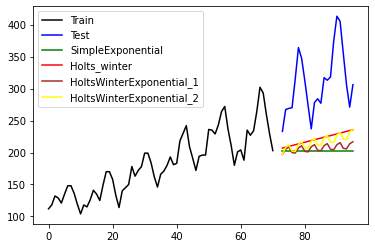

In [34]:
# visualisation of forecasted values for test data set using different methods
plt.plot(train.index,train['Passengers'],label='Train',color='black')
plt.plot(test.index,test['Passengers'],label='Test',color='blue')
plt.plot(pred_ses.index,pred_ses,label='SimpleExponential',color='green')
plt.plot(pred_hw.index,pred_hw,label='Holts_winter',color='red')
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label='HoltsWinterExponential_1',color='brown')
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label='HoltsWinterExponential_2',color='yellow')
plt.legend(loc='best')